In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

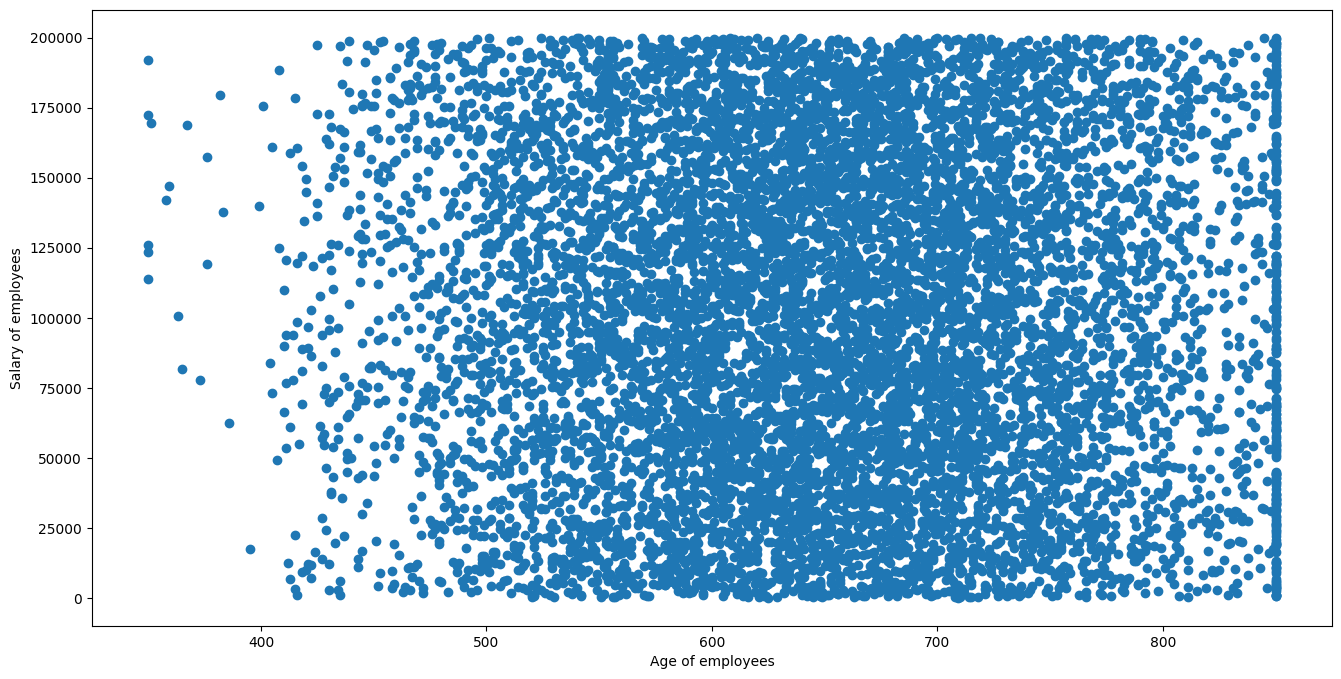

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['CreditScore'], df['EstimatedSalary'])
ax.set_xlabel('Age of employees')
ax.set_ylabel('Salary of employees')
plt.show

In [9]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [10]:
from scipy import stats
def drop_outlier(df,col_name):
  print(df.shape)
  z=np.abs(stats.zscore(col_name))
  df.drop(df.index[np.where(abs(z)>2.5)],inplace=True)
  print("New data shape:"+str(df.shape))

In [11]:
drop_outlier(df,df['CreditScore'])

(10000, 11)
New data shape:(9974, 11)


In [12]:
drop_outlier(df,df['EstimatedSalary'])

(9974, 11)
New data shape:(9974, 11)


In [13]:
drop_outlier(df,df['Balance'])

(9974, 11)
New data shape:(9972, 11)


In [14]:
from sklearn.preprocessing import LabelEncoder
for col in['Geography','Gender']:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

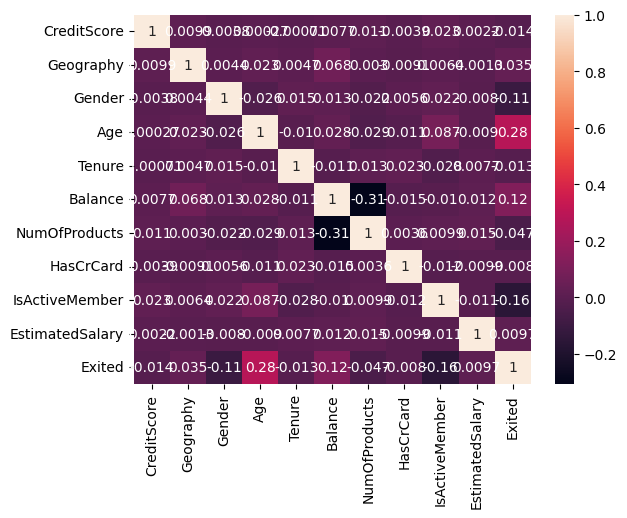

In [16]:
import seaborn as sns
df.corr()
sns.heatmap(df.corr(),annot=True)

In [18]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.009857,-0.003765,0.000265,-0.000713,0.007724,0.010541,-0.003935,0.022930,0.002176,-0.013888
Geography,0.009857,1.000000,0.004435,0.023278,0.004658,0.068342,0.002986,-0.009084,0.006407,-0.001326,0.034561
Gender,-0.003765,0.004435,1.000000,-0.026409,0.015068,0.012971,-0.021650,0.005586,0.022124,-0.008008,-0.106246
Age,0.000265,0.023278,-0.026409,1.000000,-0.010429,0.027729,-0.028795,-0.010844,0.086652,-0.008982,0.284040
Tenure,-0.000713,0.004658,0.015068,-0.010429,1.000000,-0.011439,0.013290,0.022521,-0.027639,0.007710,-0.013004
Balance,0.007724,0.068342,0.012971,0.027729,-0.011439,1.000000,-0.306873,-0.014632,-0.010320,0.012461,0.117456
NumOfProducts,0.010541,0.002986,-0.021650,-0.028795,0.013290,-0.306873,1.000000,0.003623,0.009941,0.015015,-0.046821
HasCrCard,-0.003935,-0.009084,0.005586,-0.010844,0.022521,-0.014632,0.003623,1.000000,-0.012031,-0.009929,-0.007954
IsActiveMember,0.022930,0.006407,0.022124,0.086652,-0.027639,-0.010320,0.009941,-0.012031,1.000000,-0.010520,-0.155408
EstimatedSalary,0.002176,-0.001326,-0.008008,-0.008982,0.007710,0.012461,0.015015,-0.009929,-0.010520,1.000000,0.009697


In [20]:
from sklearn.feature_selection import chi2
x=df.drop(columns=['Exited'])
y=df['Exited']

<Axes: >

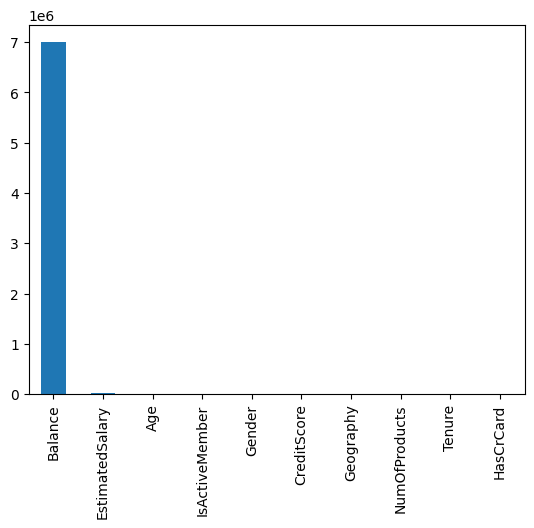

In [21]:
chi_scores=chi2(x,y)
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [28]:
from sklearn.preprocessing import StandardScaler

required = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
sc = StandardScaler()
df[required] = sc.fit_transform(df[required])


In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.336724,0,0,0.295369,-1.042623,-1.225585,1,1,1,0.023120,1
1,-0.451589,2,0,0.199940,-1.388476,0.118339,1,0,1,0.217715,0
2,-1.558465,0,0,0.295369,1.032496,1.334699,3,1,0,0.241861,1
3,0.498654,0,0,0.009082,-1.388476,-1.225585,2,0,0,-0.107649,0
4,2.075431,2,0,0.390798,-1.042623,0.787078,1,1,1,-0.363938,0


In [33]:
from sklearn.decomposition import PCA
cat = df[['HasCrCard', 'IsActiveMember', 'Geography', 'NumOfProducts', 'Gender', 'Tenure', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
X = cat
pca = PCA(n_components=5)
np.ascontiguousarray(pca.fit_transform(X))


array([[-0.69024783,  0.98259071,  0.04667715, -0.85832907,  0.74173878],
       [ 0.75025646,  0.61331985,  0.2718347 , -1.16772863,  0.19571769],
       [ 0.4565472 , -0.54343115,  1.82441251,  0.68517871, -0.12462176],
       ...,
       [-1.24006079,  0.50714996, -0.73920286,  0.89529672, -0.24725167],
       [ 0.28962795,  0.29949043, -1.34830215, -0.29132574,  0.23767327],
       [ 0.42152917,  0.07556617, -1.52547406, -0.06514442, -1.65766139]])

In [37]:
pca.explained_variance_ratio_


array([0.15962013, 0.15074267, 0.14855504, 0.14737544, 0.14555173])

In [40]:
pca = PCA(n_components=4)
np.ascontiguousarray(pca.fit_transform(X))
pca.explained_variance_ratio_


array([0.15962013, 0.15074267, 0.14855504, 0.14737544])

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(X)
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratios)


Explained Variance Ratios: [0.15962013 0.15074267 0.14855504]
